### Note for question3
- Please follow the template to complete q3
- You may create new cells to report your results and observations

In [3]:
# Import libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 6.0)
from mpl_toolkits.mplot3d import Axes3D
import time
import math
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 
import random

## P1. Load data and plot
### TODO
- load q3_data.csv
- plot the points of different labels with different color

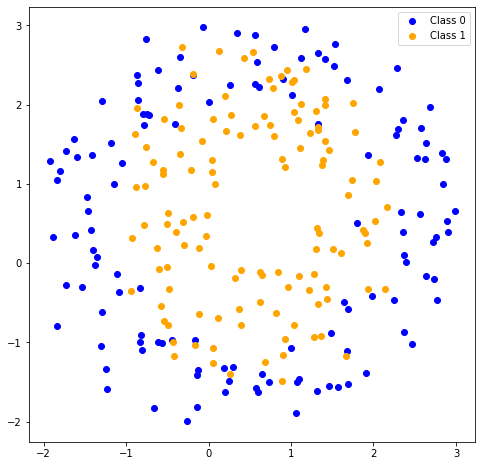

In [4]:
# Load dataset
data = pd.read_csv("q3_data.csv")
datanp = data.to_numpy()
x = datanp[:,0:2]
label = datanp[:,2]

#plot
plt.figure(figsize = (8,8))
plt.scatter(x[:126,0], x[:126,1], c = 'blue', label="Class 0")
plt.scatter(x[127:,0], x[127:,1], c = 'orange', label ="Class 1")
plt.legend()
plt.show()

## P2. Feature mapping
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up

In [5]:
print(x.shape)
samples, Dimension = x.shape
assert(Dimension==2)

(251, 2)


In [6]:
# Transform points to 28D space
def map_feature(x, degree=6):
    x2D = x
    samples, Dimension = x2D.shape
    assert(Dimension==2)
    poly = PolynomialFeatures(degree)
    x28D = poly.fit_transform(x)
    return x28D
x28D = map_feature(x, degree=6)
print(x28D.shape)


(251, 28)


## P3. Regularized Logistic Regression
### TODO
- implement function **logistic_regpression_regularized()** as required in the write-up
- draw the decision boundary

### Hints
- recycling code from HW2 is allowed
- you may use functions defined this section for part 4 below
- although optional for the report, plotting the convergence curve will be helpful

In [7]:
X = x28D
Y = label
print(X.shape)
print(Y.shape)

(251, 28)
(251,)


In [8]:
# Pass in the required arguments
# Implement the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def Pred(w,X):
    z = np.array(w[0]+w[1]*np.array(X[:,0])
                 +w[2]*np.array(X[:,1])+w[3]*np.array(X[:,2])
                 +w[4]*np.array(X[:,3])+w[5]*np.array(X[:,4])
                 +w[6]*np.array(X[:,5])+w[7]*np.array(X[:,6])
                 +w[8]*np.array(X[:,7])+w[9]*np.array(X[:,8]) 
                 +w[10]*np.array(X[:,9])+w[11]*np.array(X[:,10])
                 +w[12]*np.array(X[:,11])+w[13]*np.array(X[:,12])
                 +w[14]*np.array(X[:,13])+w[15]*np.array(X[:,14])
                 +w[16]*np.array(X[:,15])+w[17]*np.array(X[:,16]) 
                 +w[18]*np.array(X[:,17])+w[19]*np.array(X[:,18])
                 +w[20]*np.array(X[:,19])+w[21]*np.array(X[:,20])
                 +w[22]*np.array(X[:,21])+w[23]*np.array(X[:,22])
                 +w[24]*np.array(X[:,23])+w[25]*np.array(X[:,24]) 
                 +w[26]*np.array(X[:,25])+w[27]*np.array(X[:,26]))
    return sigmoid(z)

In [10]:
def calculate_gradients(w, X, Y, lamb):
        pred = Pred(w,X)
        m,feat = X.shape
        gradient = [0]*28
        gradient[0] = -1 * sum(Y*(1-pred) - (1-Y)*pred)
        gradient[1] = -1 * (sum(Y*(1-pred)*X[:,0] - (1-Y)*pred*X[:,0])+(lamb*w[1]/m))
        gradient[2] = -1 * (sum(Y*(1-pred)*X[:,1] - (1-Y)*pred*X[:,1])+(lamb*w[2]/m))
        gradient[3] = -1 * (sum(Y*(1-pred)*X[:,2] - (1-Y)*pred*X[:,2])+(lamb*w[3]/m))
        gradient[4] = -1 * (sum(Y*(1-pred)*X[:,3] - (1-Y)*pred*X[:,3])+(lamb*w[4]/m))
        gradient[5] = -1 * (sum(Y*(1-pred)*X[:,4] - (1-Y)*pred*X[:,4])+(lamb*w[5]/m))
        gradient[6] = -1 * (sum(Y*(1-pred)*X[:,5] - (1-Y)*pred*X[:,5])+(lamb*w[6]/m))
        gradient[7] = -1 * (sum(Y*(1-pred)*X[:,6] - (1-Y)*pred*X[:,6])+(lamb*w[7]/m))
        gradient[8] = -1 * (sum(Y*(1-pred)*X[:,7] - (1-Y)*pred*X[:,7])+(lamb*w[8]/m))
        gradient[9] = -1 * (sum(Y*(1-pred)*X[:,8] - (1-Y)*pred*X[:,8])+(lamb*w[9]/m))
        gradient[10] = -1 * (sum(Y*(1-pred)*X[:,9] - (1-Y)*pred*X[:,9])+(lamb*w[10]/m))
        gradient[11] = -1 * (sum(Y*(1-pred)*X[:,10] - (1-Y)*pred*X[:,10])+(lamb*w[11]/m))
        gradient[12] = -1 * (sum(Y*(1-pred)*X[:,11] - (1-Y)*pred*X[:,11])+(lamb*w[12]/m))
        gradient[13] = -1 * (sum(Y*(1-pred)*X[:,12] - (1-Y)*pred*X[:,12])+(lamb*w[13]/m))
        gradient[14] = -1 * (sum(Y*(1-pred)*X[:,13] - (1-Y)*pred*X[:,13])+(lamb*w[14]/m))
        gradient[15] = -1 * (sum(Y*(1-pred)*X[:,14] - (1-Y)*pred*X[:,14])+(lamb*w[15]/m))
        gradient[16] = -1 * (sum(Y*(1-pred)*X[:,15] - (1-Y)*pred*X[:,15])+(lamb*w[16]/m))
        gradient[17] = -1 * (sum(Y*(1-pred)*X[:,16] - (1-Y)*pred*X[:,16])+(lamb*w[17]/m))
        gradient[18] = -1 * (sum(Y*(1-pred)*X[:,17] - (1-Y)*pred*X[:,17])+(lamb*w[18]/m))
        gradient[19] = -1 * (sum(Y*(1-pred)*X[:,18] - (1-Y)*pred*X[:,18])+(lamb*w[19]/m))
        gradient[20] = -1 * (sum(Y*(1-pred)*X[:,19] - (1-Y)*pred*X[:,19])+(lamb*w[20]/m))
        gradient[21] = -1 * (sum(Y*(1-pred)*X[:,20] - (1-Y)*pred*X[:,20])+(lamb*w[21]/m))
        gradient[22] = -1 * (sum(Y*(1-pred)*X[:,21] - (1-Y)*pred*X[:,21])+(lamb*w[22]/m))
        gradient[23] = -1 * (sum(Y*(1-pred)*X[:,22] - (1-Y)*pred*X[:,22])+(lamb*w[23]/m))
        gradient[24] = -1 * (sum(Y*(1-pred)*X[:,23] - (1-Y)*pred*X[:,23])+(lamb*w[24]/m))
        gradient[25] = -1 * (sum(Y*(1-pred)*X[:,24] - (1-Y)*pred*X[:,24])+(lamb*w[25]/m))
        gradient[26] = -1 * (sum(Y*(1-pred)*X[:,25] - (1-Y)*pred*X[:,25])+(lamb*w[26]/m))
        gradient[27] = -1 * (sum(Y*(1-pred)*X[:,26] - (1-Y)*pred*X[:,26])+(lamb*w[27]/m))
        return gradient

In [11]:
def update_weights(c_g, prev_weights, learning_rate, iteratnum=100, lamb=1):
    UWlist = []
    iterat = 0
    #count = 1
    while True:
        prev_weights = c_g
        w0 = prev_weights[0] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[0]
        w1 = prev_weights[1] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[1]
        w2 = prev_weights[2] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[2]
        w3 = prev_weights[3] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[3]
        w4 = prev_weights[4] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[4]
        w5 = prev_weights[5] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[5]
        w6 = prev_weights[6] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[6]
        w7 = prev_weights[7] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[7]
        w8 = prev_weights[8] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[8]
        w9 = prev_weights[9] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[9]
        w10 = prev_weights[10] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[10]
        w11 = prev_weights[11] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[11]
        w12 = prev_weights[12] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[12]
        w13 = prev_weights[13] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[13]
        w14 = prev_weights[14] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[14]
        w15 = prev_weights[15] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[15]
        w16 = prev_weights[16] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[16]
        w17 = prev_weights[17] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[17]
        w18 = prev_weights[18] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[18]
        w19 = prev_weights[19] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[19]
        w20 = prev_weights[20] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[20]
        w21 = prev_weights[21] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[21]
        w22 = prev_weights[22] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[22]
        w23 = prev_weights[23] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[23]
        w24 = prev_weights[24] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[24]
        w25 = prev_weights[25] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[25]
        w26 = prev_weights[26] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[26]
        w27 = prev_weights[27] - learning_rate*calculate_gradients(prev_weights,X,Y,lamb)[27] 
        c_g = [w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, w21, w22, w23, w24, w25, w26, w27]
        UWlist.append(c_g)
        #count = count + 1
        #print(count)
        if (c_g[0]-prev_weights[0])**2 + (c_g[1]-prev_weights[1])**2 + (c_g[2]-prev_weights[2])**2 + (c_g[3]-prev_weights[3])**2 + (c_g[4]-prev_weights[4])**2 + (c_g[5]-prev_weights[5])**2 + (c_g[6]-prev_weights[6])**2 + (c_g[7]-prev_weights[7])**2 + (c_g[8]-prev_weights[8])**2 + (c_g[9]-prev_weights[9])**2 + (c_g[10]-prev_weights[10])**2 + (c_g[11]-prev_weights[11])**2 + (c_g[12]-prev_weights[12])**2 + (c_g[13]-prev_weights[13])**2 + (c_g[14]-prev_weights[14])**2 + (c_g[15]-prev_weights[15])**2 + (c_g[16]-prev_weights[16])**2 + (c_g[17]-prev_weights[17])**2 + (c_g[18]-prev_weights[18])**2 + (c_g[19]-prev_weights[19])**2 + (c_g[20]-prev_weights[20])**2 + (c_g[21]-prev_weights[21])**2 + (c_g[22]-prev_weights[22])**2 + (c_g[23]-prev_weights[23])**2 + (c_g[24]-prev_weights[24])**2 + (c_g[25]-prev_weights[25])**2 + (c_g[26]-prev_weights[26])**2 + (c_g[27]-prev_weights[27])**2 <pow(10,-6):
            return c_g, UWlist
        
        if iterat>iteratnum:
            return c_g, UWlist
        iterat = iterat + 1

In [12]:
randomlist = []
for i in range(0,28):
    n = random.randint(1,20)
    randomlist.append(n)
print(randomlist)

[15, 20, 7, 10, 13, 4, 1, 20, 18, 5, 3, 18, 2, 5, 5, 2, 7, 1, 14, 16, 11, 16, 11, 18, 17, 18, 15, 16]


In [26]:
randomlist = []
for i in range(0,28):
    n = random.randint(1,20)
    randomlist.append(n)
inputweights = randomlist

# Define your functions here

def main(X, Y, w, learning_rate = 0.05, num_steps = 500, lamb=1):
    inputweights = w      
    UW, UWlist = update_weights(inputweights,inputweights,learning_rate,iteratnum=num_steps, lamb=lamb)
    return UW, UWlist

UW, UWlist = main(X=X, Y=Y, w=inputweights, learning_rate = 0.05, num_steps = 500, lamb=1)

In [14]:
final_weights = UW
inputvalue = X
print("These are my final weights: " + str(final_weights))

These are my final weights: [111.23248463023553, 114.32693181317917, 62.38700511752238, 89.63427909662757, 56.918441898351574, 147.08961124246048, 203.4649120997185, 81.68046644879682, 129.13542147205123, 139.45075799708462, 274.300909943124, 60.08637243342439, 149.3138471095328, 158.23595493733797, 252.6289451593855, -60.33365452668486, 86.5748387170658, 96.8274197157939, 83.24810620996178, 144.9474799306385, 134.27805994229794, -22.302636541139204, -115.30050030318532, -81.44025587819895, -83.87836611312214, -96.09036286041666, -152.23336375377426, -78.34979969033074]


In [15]:
def finalpred(w,X):
    z = np.array(w[0]+w[1]*np.array(X[0])
                 +w[2]*np.array(X[1])+w[3]*np.array(X[2])
                 +w[4]*np.array(X[3])+w[5]*np.array(X[4])
                 +w[6]*np.array(X[5])+w[7]*np.array(X[6])
                 +w[8]*np.array(X[7])+w[9]*np.array(X[8]) 
                 +w[10]*np.array(X[9])+w[11]*np.array(X[10])
                 +w[12]*np.array(X[11])+w[13]*np.array(X[12])
                 +w[14]*np.array(X[13])+w[15]*np.array(X[14])
                 +w[16]*np.array(X[15])+w[17]*np.array(X[16]) 
                 +w[18]*np.array(X[17])+w[19]*np.array(X[18])
                 +w[20]*np.array(X[19])+w[21]*np.array(X[20])
                 +w[22]*np.array(X[21])+w[23]*np.array(X[22])
                 +w[24]*np.array(X[23])+w[25]*np.array(X[24]) 
                 +w[26]*np.array(X[25])+w[27]*np.array(X[26]))
    return sigmoid(z)

In [16]:
xvalue = x28D[0,:]
xvalue[27]
look = xvalue
prediction = finalpred(final_weights, xvalue)

In [17]:
datasize,DIM = x28D.shape 
zmatrix = []
for value in range(datasize):
    xvalue = x28D[value,:]
    zvalue = finalpred(final_weights, xvalue)
    zmatrix.append(zvalue)
zmatrix = np.array(zmatrix)

In [18]:
x1 = np.linspace(-2, 3, 500)
x2 = np.linspace(-2, 3, 500)
x1mesh, x2mesh = np.meshgrid(x1, x2)
row,col = x1mesh.shape
zmatrix = np.zeros((row,col))
citer = 0
for r in range(row): 
    for c in range(col):
        xaugment = np.array([[x1mesh[r][c],x2mesh[r][c]]])
        x28Dmesh = map_feature(xaugment, degree=6)
        xvalue = x28Dmesh[0,:]
        zvalue = finalpred(final_weights, xvalue)
        np.put(zmatrix, [citer], zvalue)
        citer = citer + 1



C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'c'
  


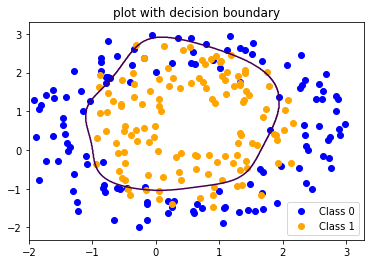

In [19]:
# Plot decision boundary
plt.contour(x1mesh,x2mesh,zmatrix, c=['black'], levels = [0.5])
plt.scatter(x[:126,0], x[:126,1], c = 'blue', label="Class 0")
plt.scatter(x[127:,0], x[127:,1], c = 'orange', label ="Class 1")
plt.title("plot with decision boundary") 
plt.legend()
plt.show()

## P4. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 1, 100]$
- draw the decision boundaries


In [28]:
x1 = np.linspace(-1.5, 2.5, 250)
x2 = np.linspace(-1.5, 2.5, 250)
x1mesh, x2mesh = np.meshgrid(x1, x2)

Weights for Lamb0 Complete


C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'c'


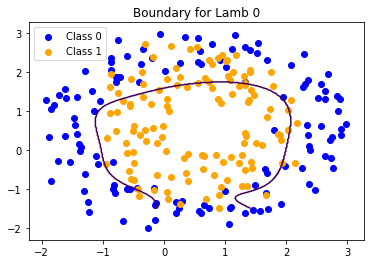

Weights for Lamb1 Complete


C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: UserWarning: The following kwargs were not used by contour: 'c'


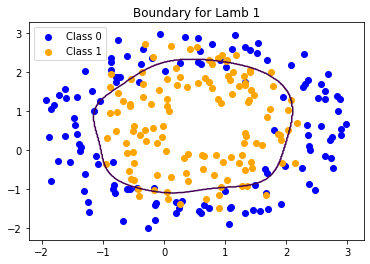

Weights for Lamb 100 Complete


C:\Users\rdesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: UserWarning: The following kwargs were not used by contour: 'c'


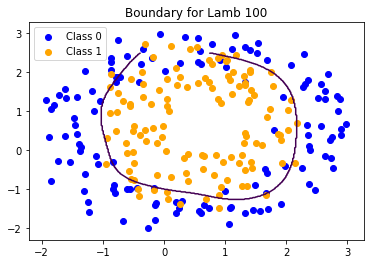

In [38]:
# lambda = 0
initallist = [15, 20, 7, 10, 13, 4, 1, 20, 18, 5, 3, 18, 2, 5, 5, 2, 7, 1, 14, 16, 11, 16, 11, 18, 17, 18, 15, 16]
inputweights = initallist

UW_lamb0, UWlist = main(X=X, Y=Y, w=inputweights, learning_rate = 0.04, num_steps = 500, lamb=0)
print("Weights for Lamb0 Complete")
final_weights_lamb0 = UW_lamb0

row,col = x1mesh.shape
zmatrix_lamb0 = np.zeros((row,col))
citer = 0
for r in range(row): 
    for c in range(col):
        xaugment = np.array([[x1mesh[r][c],x2mesh[r][c]]])
        x28Dmesh = map_feature(xaugment, degree=6)
        ###
        xvalue = x28Dmesh[0,:]
        ####
        zvalue_lamb0 = finalpred(final_weights_lamb0, xvalue)
        np.put(zmatrix_lamb0, [citer], zvalue_lamb0)
        citer = citer + 1
        
plt.contour(x1mesh,x2mesh,zmatrix_lamb0, c=['black'], levels = [0.5])
plt.scatter(x[:126,0], x[:126,1], c = 'blue', label="Class 0")
plt.scatter(x[127:,0], x[127:,1], c = 'orange', label ="Class 1")
plt.legend()
plt.title("Boundary for Lamb 0")
plt.show()

# lambda = 1

initallist = [15, 20, 7, 10, 13, 4, 1, 20, 18, 5, 3, 18, 2, 5, 5, 2, 7, 1, 14, 16, 11, 16, 11, 18, 17, 18, 15, 16]
inputweights = initallist

UW_lamb1, UWlist = main(X=X, Y=Y, w=inputweights, learning_rate = 0.04, num_steps = 500, lamb=1)
print("Weights for Lamb1 Complete")
final_weights_lamb1 = UW_lamb1

row,col = x1mesh.shape
zmatrix_lamb1 = np.zeros((row,col))
citer = 0
for r in range(row): 
    for c in range(col):
        xaugment = np.array([[x1mesh[r][c],x2mesh[r][c]]])
        x28Dmesh = map_feature(xaugment, degree=6)
        ###
        xvalue = x28Dmesh[0,:]
        ####
        zvalue_lamb1 = finalpred(final_weights_lamb1, xvalue)
        np.put(zmatrix_lamb1, [citer], zvalue_lamb1)
        citer = citer + 1
        
plt.contour(x1mesh,x2mesh,zmatrix_lamb1, c=['black'], levels = [0.5])
plt.scatter(x[:126,0], x[:126,1], c = 'blue', label="Class 0")
plt.scatter(x[127:,0], x[127:,1], c = 'orange', label ="Class 1")
plt.legend()
plt.title("Boundary for Lamb 1")
plt.show()

# lambda = 100

initallist = [15, 20, 7, 10, 13, 4, 1, 20, 18, 5, 3, 18, 2, 5, 5, 2, 7, 1, 14, 16, 11, 16, 11, 18, 17, 18, 15, 16]
inputweights = initallist

UW_lamb100, UWlist = main(X=X, Y=Y, w=inputweights, learning_rate = 0.04, num_steps = 500, lamb=100)
print("Weights for Lamb 100 Complete")
final_weights_lamb100 = UW_lamb100

row,col = x1mesh.shape
zmatrix_lamb100 = np.zeros((row,col))
citer = 0
for r in range(row): 
    #print("Entering Row: " + str(r))
    for c in range(col):
        xaugment = np.array([[x1mesh[r][c],x2mesh[r][c]]])
        x28Dmesh = map_feature(xaugment, degree=6)
        ###
        xvalue = x28Dmesh[0,:]
        ####
        zvalue_lamb100 = finalpred(final_weights_lamb100, xvalue)
        np.put(zmatrix_lamb100, [citer], zvalue_lamb100)
        citer = citer + 1
        
plt.contour(x1mesh,x2mesh,zmatrix_lamb100, c=['black'], levels = [0.5])
plt.scatter(x[:126,0], x[:126,1], c = 'blue', label="Class 0")
plt.scatter(x[127:,0], x[127:,1], c = 'orange', label ="Class 1")
plt.legend()
plt.title("Boundary for Lamb 100")
plt.show()

Answer for part (d) here: 



In [ ]:
#For lambda 0,1, and 100 the plots looks
#different for each graph have different 
#final weights. At lambda = 0 the model 
#is overfitted because weights that are
#unnessary are not being eliminated. The 
#plot is trying to fit too many data 
#points causing the graph to be smaller 
#then nessary and open at the bottom
#At lambda = 1 the model is about right
#as the weights that are unnessary are
#being eliminated but weights that are
#important are still being maintained. 
#At lambda = 100 the model is underfitted 
#as weights that are required to properly 
#fit the model are being minimized. The 
#plot is missing data point that should be 
#incompassed by the decision boundary as 
#the decision boundary gets larger  